In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import arviz as az
import seaborn as sns
import pymc as pm
import pymc.sampling_jax
import warnings

warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
pd.options.mode.chained_assignment = None

/Users/corrado/opt/anaconda3/envs/pymc_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")
sns.set_theme(palette="colorblind")

In [3]:
mu = 175
sigma = 7
n = 30
n_samples = 1000

samples = np.stack([np.random.normal(loc=mu, scale=sigma, size=n) for i in range(n_samples)])
samples.shape

(1000, 30)

In [4]:
print(*samples[1, :])

177.83219304922662 174.31935109653102 182.1185586645147 177.80999939154256 165.96096744820713 177.120129216361 176.13203023153875 174.53598672845953 181.95718009148845 168.38929602528475 174.9985003922271 175.18103254963566 171.5852914839013 171.2904628569476 181.74389559798263 187.67893057002513 165.9001617145532 169.61174922199132 168.406712310235 172.7302820303106 182.7036713641003 178.82799553868082 181.75464231083757 176.29604831978259 166.36677520646222 187.93749341599772 175.02893638200666 171.69269991830885 167.5122900407336 184.6073806929246


In [5]:
xbar = samples.mean(axis=1)
print(*xbar[0:10])

175.61988122322512 175.60102146202658 176.21015373449796 174.74788245714817 173.38396241975641 175.04983796415385 173.563299468819 175.66416242656885 174.3377589335775 175.27659188348804


In [6]:
alpha = 0.05
t = st.t.ppf(1 - alpha/2, n-1)
t

2.045229642132703

In [7]:
interval_width = t * samples.std(axis=1, ddof=1) / np.sqrt(n)
CI_low = samples.mean(axis=1) - interval_width
CI_high = samples.mean(axis=1) + interval_width

In [8]:
coverage_p = np.sum(np.logical_and(CI_low < mu, mu < CI_high)) / samples.shape[0]
coverage_p

0.963

In [9]:
sample_size = 20
mu = 50
sigma = 10
sample_data = np.random.normal(loc=mu, scale=sigma, size=n)
print(sample_data)

[46.44486334 41.29653576 52.86509639 54.41422925 49.41529198 46.6643866
 39.74706556 51.33323313 46.73849396 54.82522455 75.88679073 58.18926621
 65.78567688 58.27980557 51.08633391 55.01817928 50.21345281 64.21581416
 43.99693285 55.40221728 68.95334312 49.7420401  65.67234908 48.46778861
 42.49831661 40.75549254 60.08192296 47.36424413 58.59282092 56.14639273]


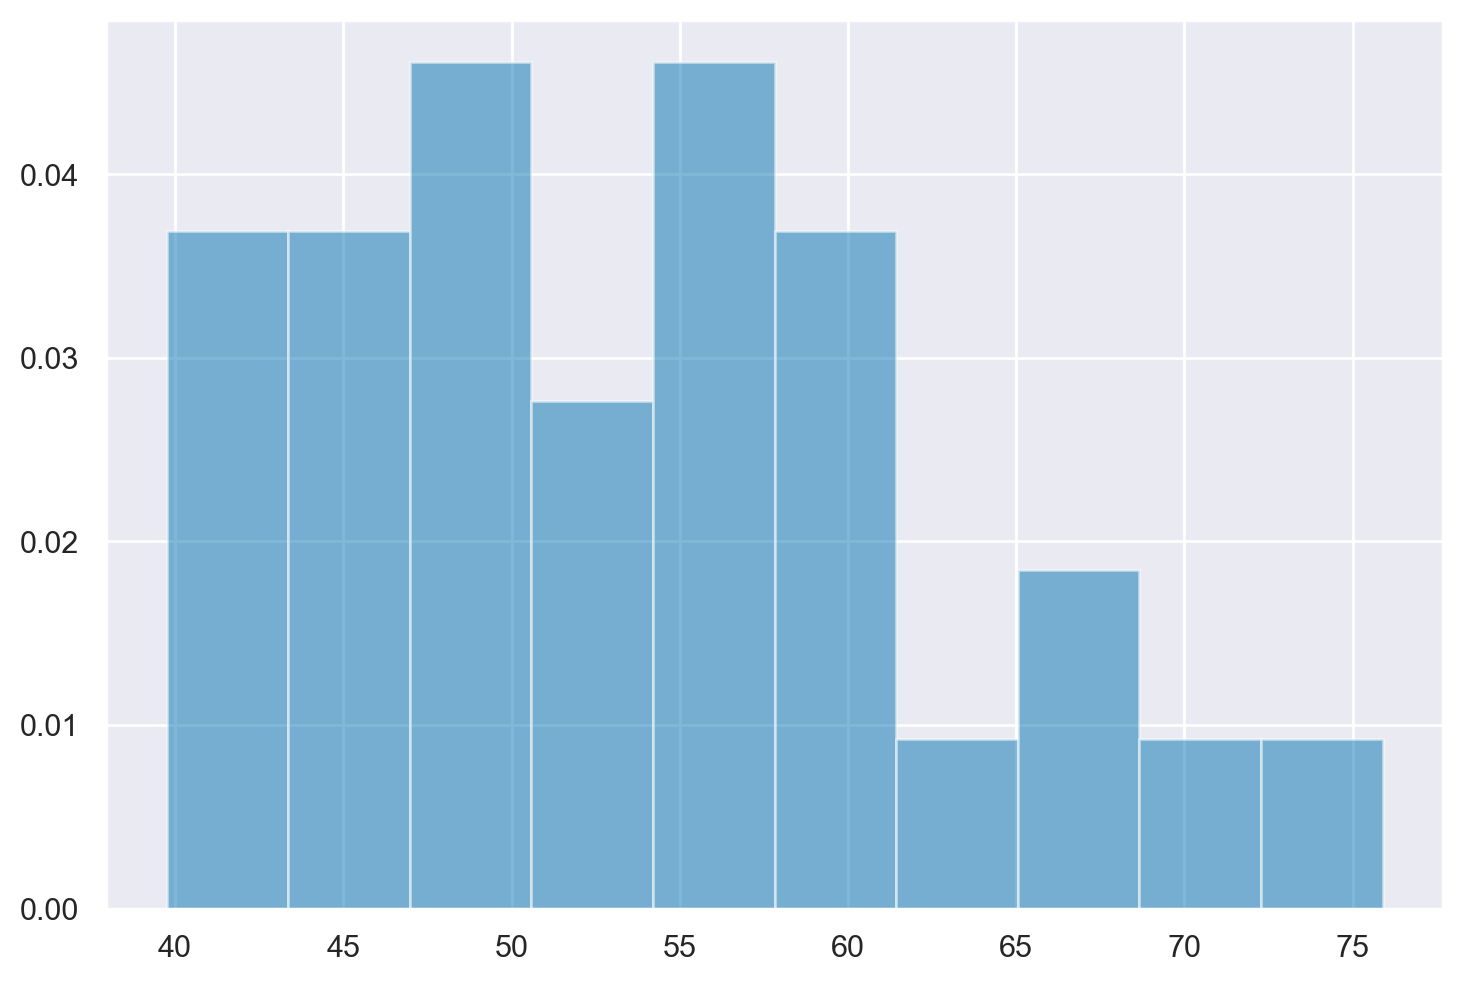

In [10]:
plt.hist(sample_data, density=True, alpha=0.5)
plt.show()

In [11]:
sample_mean = np.mean(sample_data)
sample_mean

53.336453366467744

In [12]:
sample_stddev = np.std(sample_data, ddof=1)
sample_stddev

8.812754077676356

In [13]:
standard_error = sample_stddev / np.sqrt(sample_size)
print(standard_error)

1.9705917186672792


In [14]:
degrees_of_freedom = sample_size - 1
t_val = st.t.ppf(0.975, degrees_of_freedom)
print(t_val)

2.093024054408263


In [15]:
margin_of_error = t_val * standard_error
print(margin_of_error)

4.124495868588336


In [16]:
confidence_interval_lower = sample_mean - margin_of_error
confidence_interval_upper = sample_mean + margin_of_error
confidence_interval = [confidence_interval_lower, confidence_interval_upper]
print(confidence_interval)

[49.21195749787941, 57.46094923505608]


In [17]:
def visualize_output(sample_data, sample_mean, interval, type_interval):
    plt.hist(sample_data, density=True, alpha=0.5)
    plt.axvline(x=sample_mean, color='r', linestyle='dashed', linewidth=2)
    plt.axvline(x=interval[0], color='g', linewidth=2)
    plt.axvline(x=interval[1], color='g', linewidth=2)
    plt.legend(['Sample Mean', f'{type_interval} interval'])

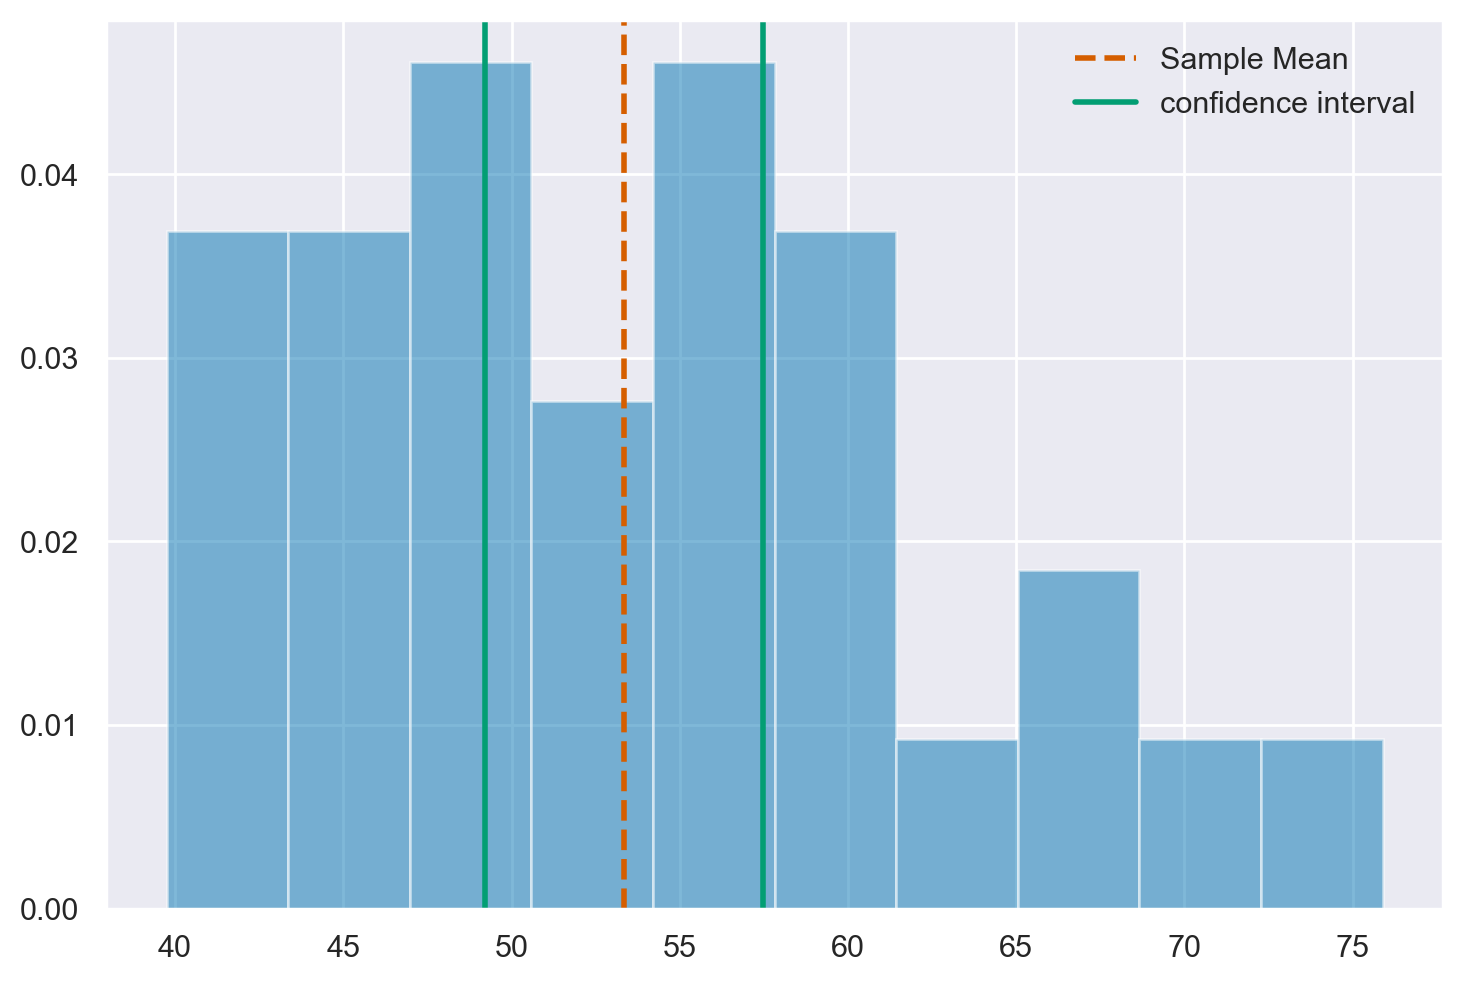

In [18]:
visualize_output(sample_data, sample_mean, confidence_interval, 'confidence')

In [19]:
model = pm.Model()

with model:
    mu = pm.Normal("mu", mu=0, sigma=200)
    sigma = pm.HalfNormal("sigma", 100)
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=sample_data)

In [20]:
with model:
    idata = pm.sampling_jax.sample_numpyro_nuts()

Compiling...


Compilation time = 0:00:01.755369


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1017.71it/s]


Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1018.68it/s]


Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1019.73it/s]


Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1020.65it/s]


Sampling time = 0:00:02.308751


Transforming variables...


Transformation time = 0:00:00.097475


In [21]:
az.summary(idata, hdi_prob=0.95, round_to=2)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,53.31,1.74,50.11,56.95,0.03,0.02,2979.90,2237.07,1.0
sigma,9.23,1.29,6.89,11.91,0.03,0.02,2638.74,2408.92,1.0


In [22]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Fri Jan 26 2024

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.19.0

pymc      : 5.10.3
matplotlib: 3.8.2
pandas    : 2.1.4
seaborn   : 0.13.0
numpy     : 1.26.2
scipy     : 1.11.4
arviz     : 0.17.0

Watermark: 2.4.3

